In [1]:
import functions_new_jit as func
import importlib
importlib.reload(func)

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

import numba

"simulate_riot_stochastic" function test 

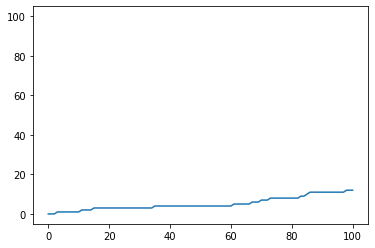

In [2]:
N = 100
average = 50
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

progression = func.simulate_riot_stochastic(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

"simulate_riot_stochastic_2" function test 

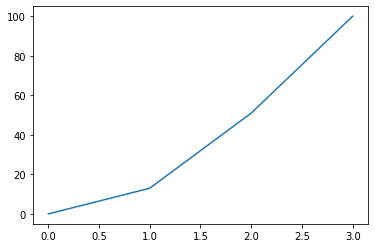

In [3]:
N = 100
average = 15
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

progression = func.simulate_riot_stochastic_2(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

Heat map of the function "simulate_riot_stochastic", given that the x axis corresponds to the number of time steps per simulation and the y axis corresponds to it's standard deviation value

92.00%


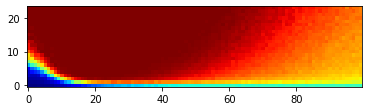

In [62]:
N = 100
average = 25
deviations = np.arange(0,100)  # standard deviations of the normal distribution
simulations = 100                    # number of simulations per standard deviation value
averages = np.array([])
steps = np.arange(1,50)

heat_map = np.zeros((49,100))

for k in steps:
    clear_output(wait=True)
    print(str("%.2f" % ((k-1)/25*100)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,average,i)
            size = func.simulate_riot_stochastic(agents, k)
            average_size += size[-1]

        average_size = average_size/simulations
        averages = np.append(averages, average_size)
        heat_map[k-1][i] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média do tamanho da greve - y = passos temporais e x = desvio padrao")
plt.show()

Heat map of the function "simulate_riot_stochastic", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

99.00%


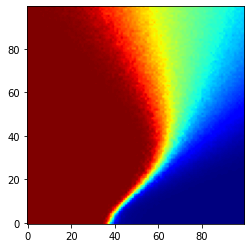

In [5]:
N = 100
averages_sample = np.arange(0,100)
deviations = np.arange(0,100)         # standard deviations of the normal distribution
simulations = 100                     # number of simulations per standard deviation value
steps = 100

heat_map = heat_map = np.zeros((len(averages_sample),len(deviations)))
    
for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic(agents, steps)
            average_size += size[-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico")
plt.show()

Heat map of the function "simulate_riot_stochastic_2", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

99.00%


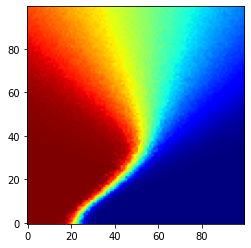

In [5]:
N = 100
averages_sample = np.arange(0,100)
deviations = np.arange(0,100)      # standard deviations of the normal distribution
simulations = 100                    # number of simulations per standard deviation value
steps = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic_2(agents, steps)
            average_size += size[-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico")
plt.show()

Reload my library

In [6]:
importlib.reload(func)

<module 'functions_new_jit' from 'D:\\UFMG\\8° Período\\IC\\Modelo de Limiares\\Modelo Novo\\functions_new_jit.py'>

Probability distributions of the chances of an agent enter or exit a riot. P(enter) = 1 - P(exit)

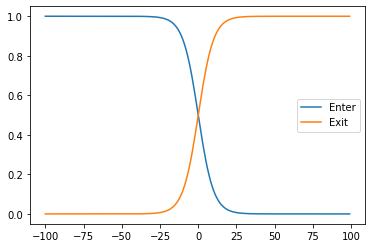

In [7]:
x = np.arange(-100,100)
m = 0.2

plt.figure()
plt.plot(x,1 / (1 + np.exp( m * x ) ),label = "Enter")
plt.plot(x,1 / (1 + np.exp( -m * x ) ),label = "Exit")
#plt.plot(x, 1 - 1 / (1 + np.exp( -m * x ) ),label = "1 - P(Sair) = P(Entrar)")
plt.legend()
plt.show()

"simulate_riot_stochastic_exit" function test 

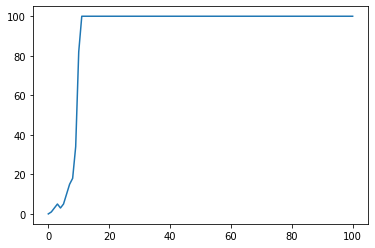

In [11]:
N = 100
average = 30
deviation = 12

agents = func.create_agents(N,average,deviation)

steps = 100

progression = func.simulate_riot_stochastic_exit(agents, steps)

plt.figure()
plt.plot(progression)
plt.ylim(-5,105)
plt.show()

Heat map of the function "simulate_riot_stochastic_exit", given that the x axis corresponds to the threshold distribution average value and the y axis corresponds to it's standard deviation value

99.00%


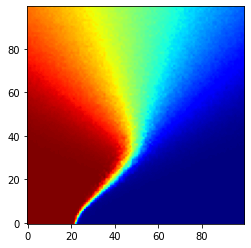

In [15]:
N = 100
average_max = 100
deviation_max = 100
averages_sample = np.arange(0,average_max)# average value of the normal distribution
deviations = np.arange(0,deviation_max)  # standard deviations of the normal distribution
simulations = 100                           # number of simulations per standard deviation value
steps = 100

heat_map = np.zeros((average_max,deviation_max))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (k/average_max * 100)+"%"), end="\n")
    
    for i in deviations:
        average_size = 0

        for j in range(simulations):
            agents = func.create_agents(N,k,i)
            size = func.simulate_riot_stochastic_exit(agents, steps)
            average_size += size[-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_2_100simulacoes")
plt.show()

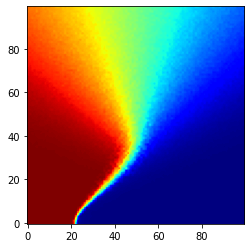

In [3]:
plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_saida")
plt.show()